In [38]:
import requests
import datetime
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_page= int(input("페이지 수를 입력하세요: "))

페이지 수를 입력하세요: 30


In [13]:
base_url_naver= "https://finance.naver.com/item/frgn.nhn?code=035420&page={}"

naver_url_list= []
for i in range(n_page):
    naver_url_list.append(base_url_naver.format(i+1))

In [14]:
naver_resp_list= []
for url in naver_url_list:
    naver_resp_list.append(requests.get(url))

In [15]:
naver_soup_list= []
for resp in naver_resp_list:
    naver_soup_list.append(BeautifulSoup(resp.text))

In [16]:
naver_table_list= []
for soup in naver_soup_list:
    for i in range(20): # 한 페이지에 20개의 날짜들이 있음
        naver_table_list.append({
        'date': soup.select('table.type2')[1].select('span')[9*i].text.replace('.','-'),
        'stocks': soup.select('table.type2')[1].select('span')[9*i + 1].text.replace(',',''),
        'ratio': soup.select('table.type2')[1].select('span')[9*i + 3].text.strip().replace('%',''),
        'tradevolume': soup.select('table.type2')[1].select('span')[9*i + 4].text.replace(',',''),
        'agencyvolume': soup.select('table.type2')[1].select('span')[9*i + 5].text.replace(',',''),
        'foreignvolume': soup.select('table.type2')[1].select('span')[9*i + 6].text.replace(',',''),
        'foreignratio': soup.select('table.type2')[1].select('span')[9*i + 8].text.replace('%','')
    })

In [17]:
naver_final_list= naver_table_list.copy()
naver_final_list.reverse()

In [18]:
naver_final_list

[{'date': '2018-02-13',
  'stocks': '805000',
  'ratio': '+0.62',
  'tradevolume': '137025',
  'agencyvolume': '-17687',
  'foreignvolume': '+8384',
  'foreignratio': '59.00'},
 {'date': '2018-02-14',
  'stocks': '811000',
  'ratio': '+0.75',
  'tradevolume': '74164',
  'agencyvolume': '-161',
  'foreignvolume': '-11295',
  'foreignratio': '58.96'},
 {'date': '2018-02-19',
  'stocks': '820000',
  'ratio': '+1.11',
  'tradevolume': '83337',
  'agencyvolume': '-2278',
  'foreignvolume': '-16168',
  'foreignratio': '58.91'},
 {'date': '2018-02-20',
  'stocks': '807000',
  'ratio': '-1.59',
  'tradevolume': '67201',
  'agencyvolume': '-14583',
  'foreignvolume': '-9574',
  'foreignratio': '58.88'},
 {'date': '2018-02-21',
  'stocks': '833000',
  'ratio': '+3.22',
  'tradevolume': '141568',
  'agencyvolume': '+9266',
  'foreignvolume': '-3093',
  'foreignratio': '58.88'},
 {'date': '2018-02-22',
  'stocks': '827000',
  'ratio': '-0.72',
  'tradevolume': '72242',
  'agencyvolume': '-431',
  

In [19]:
naver_final= pd.DataFrame(naver_final_list)

# type 변환하기

In [20]:
naver_final.date= naver_final.date.astype('datetime64')
naver_final.stocks= naver_final.stocks.astype('int')
naver_final.ratio= naver_final.ratio.astype('float')
naver_final.tradevolume= naver_final.tradevolume.astype('int')
naver_final.agencyvolume= naver_final.agencyvolume.astype('int')
naver_final.foreignvolume= naver_final.foreignvolume.astype('int')
naver_final.foreignratio= naver_final.foreignratio.astype('float')

In [21]:
naver_final.dtypes

date             datetime64[ns]
stocks                    int32
ratio                   float64
tradevolume               int32
agencyvolume              int32
foreignvolume             int32
foreignratio            float64
dtype: object

In [24]:
naver_final

,date,stocks,ratio,tradevolume,agencyvolume,foreignvolume,foreignratio
0,2018-02-13,805000,0.62,137025,-17687,8384,59.00
1,2018-02-14,811000,0.75,74164,-161,-11295,58.96
2,2018-02-19,820000,1.11,83337,-2278,-16168,58.91
3,2018-02-20,807000,-1.59,67201,-14583,-9574,58.88
4,2018-02-21,833000,3.22,141568,9266,-3093,58.88
...,...,...,...,...,...,...,...
595,2020-07-17,276000,1.10,926932,-66483,93476,55.16
596,2020-07-20,263000,-4.71,1556415,-153185,-247123,55.01
597,2020-07-21,270000,2.66,1179638,17045,47577,55.04
598,2020-07-22,270000,0.00,905784,16722,-95226,54.98


In [26]:
naver_final.to_csv("dataset/Naver_Stocks.csv")

In [32]:
naver_final.iloc[:,:2]

,date,stocks
0,2018-02-13,805000
1,2018-02-14,811000
2,2018-02-19,820000
3,2018-02-20,807000
4,2018-02-21,833000
...,...,...
595,2020-07-17,276000
596,2020-07-20,263000
597,2020-07-21,270000
598,2020-07-22,270000


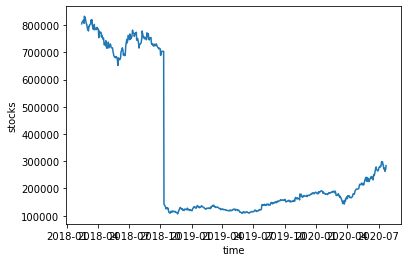

In [37]:
plt.plot(naver_final.iloc[:,0], naver_final.iloc[:,1])
plt.xlabel("time")
plt.ylabel("stocks")
plt.show()

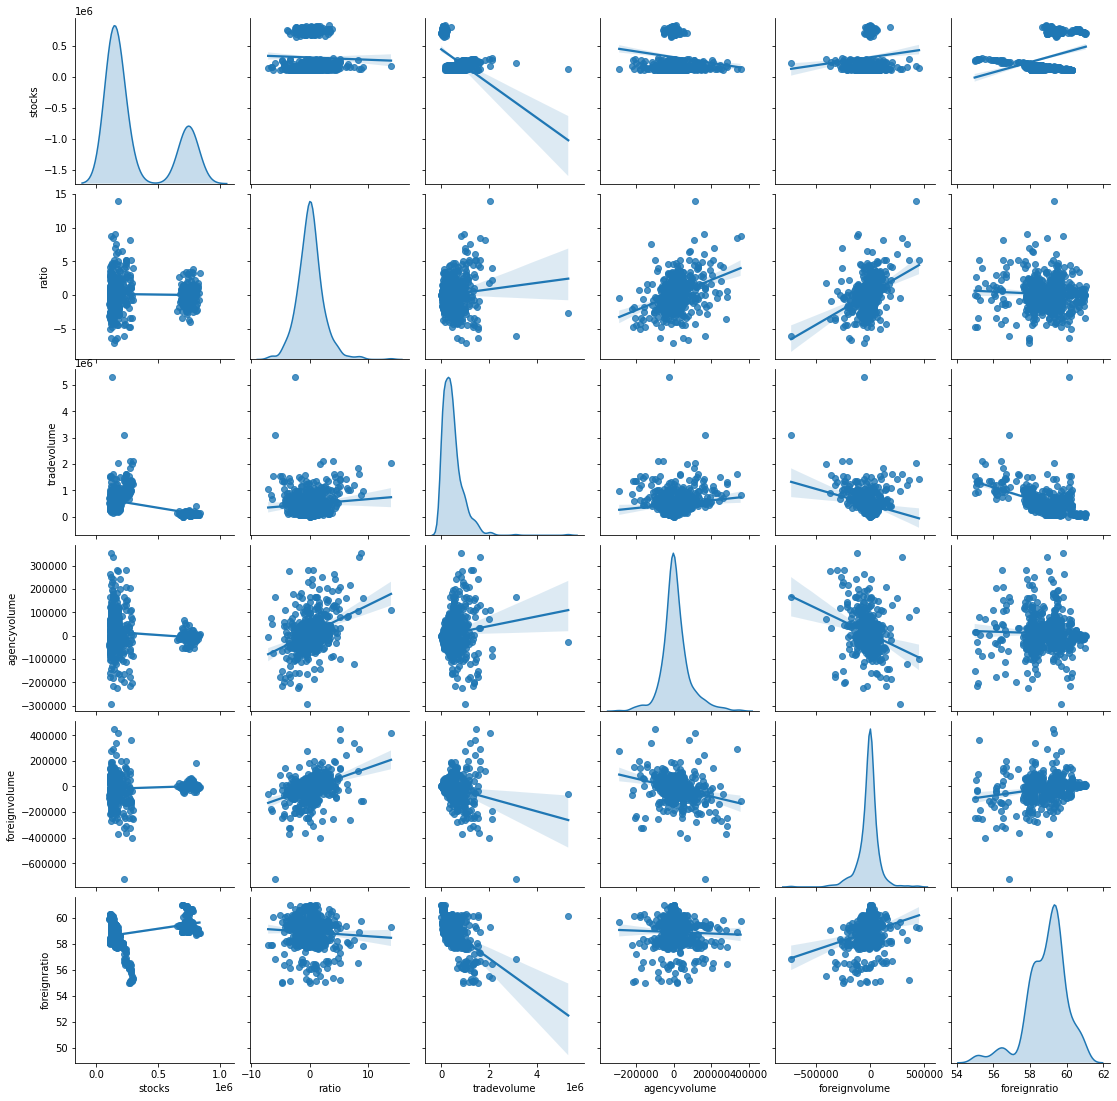

In [40]:
sns.pairplot(naver_final, kind= 'reg', diag_kind= 'kde')

# 앞으로 할 일
- 상관계수 구하고 상관관계 관찰하기
    - LinearRegression으로 변인 간 선형관계 파악하기
- 시계열분석으로 추세 파악하기
    - ARIMA model
    - LOWESS curve
- LSTM / Recurrence Plot으로 딥러닝 기법 적용해보기